In [345]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
#from datetime import datetime
from functools import reduce
import datetime
sns.set_style("darkgrid")

In [346]:
# load all the datasets to pandas DataFrames
klci         = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/FTSE Malaysia KLCI Historical (Malaysia).xlsx',header=0)
biodiesel    = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder/Biodiesel - CPO Price.xlsx',header=0)
oil_wti       = pd.read_csv('C:/Users/81/Desktop/Data Analytics/New folder/Cushing_OK_WTI_Spot_Price_FOB.csv', sep = "|",header=4)
oil_brent     = pd.read_csv('C:/Users/81/Desktop/Data Analytics/New folder/Europe_Brent_Spot_Price_FOB (1).csv', sep = "|",header=4)
usd          = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder/Forex USD-MYR.xlsx',header=0)
jpy          = pd.read_csv('C:/Users/81/Desktop/Data Analytics/New folder/JPY_MYR Historical Data.csv')
ucci         = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder/Upstream Capital Cost Index.xlsx',header=1)


se_dow       = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/Dow Jones Industrial Average (DJI) (US).xlsx',header=0)
se_dax       = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/DAX Historical Data (Germany).xlsx',header=0)
se_stoxx     = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/Euro Stoxx 50 Historical Data (US).xlsx',header=0)
se_my        = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/FTSE Malaysia KLCI Historical (Malaysia).xlsx',header=0)
se_uk        = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/FTSE 100 Historical Data (UK).xlsx',header=0)
se_sg        = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/FTSE Straits Times Singapore Hi (Singapore).xlsx',header=0)
se_hs        = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/Hang Seng Historical Data (HK).xlsx',header=0)
se_nasdaq    = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/Nasdaq 100 Historical Data (US).xlsx',header=0)
se_nikkei    = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/Nikkei 225 Historical Data (Japan).xlsx',header=0)
se_snp       = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/S&P 500 (US).xlsx',header=0)
se_shanghai  = pd.read_excel('C:/Users/81/Desktop/Data Analytics/New folder (2)/Shanghai Composite Historical D (China).xlsx',header=0)

In [347]:
# Visually inspect the dataframes

klci.head()
biodiesel.head()
oil_wti.head()
oil_brent.head()
usd.head()
jpy.head()
ucci.head()
se_dow.head()
se_dax.head()
se_stoxx.head()
se_uk.head()
se_sg.head()
se_hs.head()
se_nasdaq.head()
se_nikkei.head()
se_snp.head()
se_shanghai.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",2852.35,2835.58,2855.38,2829.63,20.68B,0.0022
1,"May 28, 2020",2846.22,2838.21,2861.92,2820.15,20.75B,0.0033
2,"May 27, 2020",2836.80,2847.32,2849.00,2831.93,19.81B,-0.0034
3,"May 26, 2020",2846.55,2827.90,2848.34,2825.90,17.46B,0.0101
4,"May 25, 2020",2817.97,2816.24,2821.50,2802.47,17.29B,0.0015


In [348]:
# get the shape of the different datasets
dflist = [klci, biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow,se_dax,se_stoxx,se_my,se_uk,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai]

for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

(2477, 7)
(241, 4)
(8670, 2)
(8382, 2)
(7818, 3)
(3407, 6)
(84, 2)
(2618, 7)
(2640, 7)
(2255, 7)
(2477, 7)
(2628, 7)
(2330, 7)
(2568, 7)
(2619, 7)
(2573, 7)
(2619, 7)
(2529, 7)


In [349]:
# get dataframe top rows view

for i, dfr in enumerate(dflist):
    print(dflist[i].head())

           Date    Price     Open     High      Low     Vol.  Change %
0  May 29, 2020  1473.25  1450.54  1473.77  1448.84  595.84M    0.0108
1  May 28, 2020  1457.50  1453.53  1458.73  1449.25  189.53M    0.0040
2  May 27, 2020  1451.73  1446.91  1458.24  1446.42  189.84M    0.0104
3  May 22, 2020  1436.76  1451.37  1451.44  1435.23  144.05M   -0.0106
4  May 21, 2020  1452.11  1437.49  1455.13  1437.13  168.06M    0.0118
                  Original Month-Year   Price  Price Cleansed
0        Apr 20001,413.60- 2000-04-01  1413.6          1413.6
1  May 20001,231.20-12.90  2000-05-01  1231.2          1231.2
2   Jun 20001,197.00-2.78  2000-06-01    1197          1197.0
3   Jul 20001,185.60-0.95  2000-07-01  1185.6          1185.6
4   Aug 20001,162.80-1.92  2000-08-01  1162.8          1162.8
         Day  Cushing OK WTI Spot Price FOB  Dollars per Barrel
0  5/27/2020                                              32.80
1  5/26/2020                                              34.70
2  5/22/20

In [350]:
# we look at the statistical charateristics of the datsets

for i, dfr in enumerate(dflist):
    print(dflist[i].describe())

             Price         Open        High          Low     Change %
count  2477.000000  2477.000000  2477.00000  2477.000000  2477.000000
mean   1666.653113  1666.370945  1671.74692  1660.694267     0.000068
std     134.667234   134.906438   134.34217   135.297094     0.006300
min    1219.720000  1217.280000  1242.82000  1207.800000    -0.052600
25%    1584.900000  1585.170000  1590.51000  1580.460000    -0.002900
50%    1672.720000  1673.840000  1678.24000  1667.680000     0.000200
75%    1774.000000  1774.420000  1778.47000  1769.120000     0.003400
max    1895.180000  1895.550000  1896.23000  1891.660000     0.068500
       Price Cleansed
count      241.000000
mean      2397.917510
std        751.643413
min        889.200000
25%       1668.200000
50%       2515.350000
75%       2943.860000
max       3980.250000
       Cushing OK WTI Spot Price FOB  Dollars per Barrel
count                                        8670.000000
mean                                           44.066501
s

In [351]:
# see which datasets have missing values

for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())

0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0


In [352]:
#drop missing value
ucci = ucci.dropna(axis=0)

### Observations and Data Cleaning:

 - For our purposes, most dataframe has extra columns so we will need to get rid of some of them.
 - The date formats need to be converted to a uniform format across all datasets.
 - ucci also has 3 NaN values so we have to remove entire rows where this exists

#### KLCI

In [353]:
dflist = [klci]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

klci.head()

(2477, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",1473.25,1450.54,1473.77,1448.84,595.84M,0.0108
1,"May 28, 2020",1457.50,1453.53,1458.73,1449.25,189.53M,0.0040
2,"May 27, 2020",1451.73,1446.91,1458.24,1446.42,189.84M,0.0104
3,"May 22, 2020",1436.76,1451.37,1451.44,1435.23,144.05M,-0.0106
4,"May 21, 2020",1452.11,1437.49,1455.13,1437.13,168.06M,0.0118


In [354]:
# change the DATE column from String to python's datetime format

klci["Date"] = pd.to_datetime(klci.Date)

In [355]:
# drop the unnecessary columns

klci.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
klci.head()

,Date,Price
0,2020-05-29,1473.25
1,2020-05-28,1457.50
2,2020-05-27,1451.73
3,2020-05-22,1436.76
4,2020-05-21,1452.11


In [356]:
# rename columns

klci.columns = ["Date", "KLCI"]
klci.head()

,Date,KLCI
0,2020-05-29,1473.25
1,2020-05-28,1457.50
2,2020-05-27,1451.73
3,2020-05-22,1436.76
4,2020-05-21,1452.11


#### Biodiesel

In [357]:
dflist = [biodiesel]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

biodiesel.head()

(241, 4)


,Original,Month-Year,Price,Price Cleansed
0,"Apr 20001,413.60-",2000-04-01,1413.6,1413.6
1,"May 20001,231.20-12.90",2000-05-01,1231.2,1231.2
2,"Jun 20001,197.00-2.78",2000-06-01,1197,1197.0
3,"Jul 20001,185.60-0.95",2000-07-01,1185.6,1185.6
4,"Aug 20001,162.80-1.92",2000-08-01,1162.8,1162.8


In [358]:
#checking the date format (already in datetime format, so dont need to change)
biodiesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
Original          241 non-null object
Month-Year        241 non-null datetime64[ns]
Price             241 non-null object
Price Cleansed    241 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.6+ KB


In [359]:
# drop the unnecessary columns

biodiesel.drop(["Original", "Price"],axis=1,inplace=True)
biodiesel.head()

,Month-Year,Price Cleansed
0,2000-04-01,1413.6
1,2000-05-01,1231.2
2,2000-06-01,1197.0
3,2000-07-01,1185.6
4,2000-08-01,1162.8


In [360]:
biodiesel.columns = ["Date", "Biodiesel"]
biodiesel.head()

,Date,Biodiesel
0,2000-04-01,1413.6
1,2000-05-01,1231.2
2,2000-06-01,1197.0
3,2000-07-01,1185.6
4,2000-08-01,1162.8


In [361]:
# Upscaling the data so it will include the days, and use interpolate to determine the value in between
biodiesel = biodiesel.resample('D', on="Date").mean()
biodiesel = biodiesel.interpolate(method='linear')
print(biodiesel.head(10))


            Biodiesel
Date                 
2000-04-01    1413.60
2000-04-02    1407.52
2000-04-03    1401.44
2000-04-04    1395.36
2000-04-05    1389.28
2000-04-06    1383.20
2000-04-07    1377.12
2000-04-08    1371.04
2000-04-09    1364.96
2000-04-10    1358.88


In [362]:
# Bring the date column from the index into a column
biodiesel.reset_index(level=0,inplace=True)
biodiesel.head()

,Date,Biodiesel
0,2000-04-01,1413.60
1,2000-04-02,1407.52
2,2000-04-03,1401.44
3,2000-04-04,1395.36
4,2000-04-05,1389.28


#### Crude oil - WTI

In [363]:
dflist = [oil_wti]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

oil_wti.head()

(8670, 2)


,Day,Cushing OK WTI Spot Price FOB Dollars per Barrel
0,5/27/2020,32.80
1,5/26/2020,34.70
2,5/22/2020,33.49
3,5/21/2020,34.30
4,5/20/2020,33.56


In [364]:
# rename columns

oil_wti.columns = ['Date', 'oil_wti']


# change the DATE column from String to datetime format

oil_wti["Date"] = pd.to_datetime(oil_wti.Date)

oil_wti.head()

,Date,oil_wti
0,2020-05-27,32.80
1,2020-05-26,34.70
2,2020-05-22,33.49
3,2020-05-21,34.30
4,2020-05-20,33.56


#### Crude oil - brent

In [365]:
dflist = [oil_brent]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

oil_brent.head()

(8382, 2)


,Day,Europe Brent Spot Price FOB Dollars per Barrel
0,5/27/2020,32.73
1,5/26/2020,33.95
2,5/22/2020,33.80
3,5/21/2020,34.78
4,5/20/2020,34.76


In [366]:
# rename columns

oil_brent.columns = ['Date', 'oil_brent']


# change the DATE column from String to datetime format

oil_brent["Date"] = pd.to_datetime(oil_brent.Date)

oil_brent.head()

,Date,oil_brent
0,2020-05-27,32.73
1,2020-05-26,33.95
2,2020-05-22,33.80
3,2020-05-21,34.78
4,2020-05-20,34.76


#### USD to MYR Currency Exchange

In [367]:
usd.head()

,Date,USD,MYR
0,2020-05-30,1,4.3475
1,2020-05-29,1,4.3475
2,2020-05-28,1,4.3555
3,2020-05-27,1,4.3475
4,2020-05-26,1,4.3635


In [368]:
# drop the unnecessary columns
usd.drop(["USD"],axis=1,inplace=True)
usd.head()

,Date,MYR
0,2020-05-30,4.3475
1,2020-05-29,4.3475
2,2020-05-28,4.3555
3,2020-05-27,4.3475
4,2020-05-26,4.3635


In [369]:
# rename columns
usd.columns = ["Date", "USD"]
usd.head()

,Date,USD
0,2020-05-30,4.3475
1,2020-05-29,4.3475
2,2020-05-28,4.3555
3,2020-05-27,4.3475
4,2020-05-26,4.3635


#### JPY to MYR Currency Exchange

In [370]:
jpy.head()

,Date,Price,Open,High,Low,Change %
0,"May 29, 2020",0.04033,0.04042,0.04063,0.04030,-0.23%
1,"May 28, 2020",0.04042,0.04036,0.04046,0.04030,0.15%
2,"May 27, 2020",0.04036,0.04059,0.04065,0.04028,-0.58%
3,"May 26, 2020",0.04059,0.04052,0.04063,0.04035,0.18%
4,"May 25, 2020",0.04052,0.04050,0.04054,0.04049,0.05%


In [371]:
jpy["Date"] = pd.to_datetime(jpy.Date)

In [372]:
# drop the unnecessary columns
jpy.drop(["Open", "High", "Low", "Change %"],axis=1,inplace=True)
jpy.head()

,Date,Price
0,2020-05-29,0.04033
1,2020-05-28,0.04042
2,2020-05-27,0.04036
3,2020-05-26,0.04059
4,2020-05-25,0.04052


In [373]:
# rename columns
jpy.columns = ["Date", "JPY"]
jpy.head()

,Date,JPY
0,2020-05-29,0.04033
1,2020-05-28,0.04042
2,2020-05-27,0.04036
3,2020-05-26,0.04059
4,2020-05-25,0.04052


#### UCCI

In [374]:
ucci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 2 columns):
Quarter                    81 non-null object
UCCI Asia and Australia    81 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [375]:
dflist = [ucci]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

ucci.head()

(81, 2)


,Quarter,UCCI Asia and Australia
0,Q1 2000,100.0
1,Q2 2000,100.0
2,Q3 2000,100.0
3,Q4 2000,100.0
4,Q1 2001,100.5


In [376]:
# rename columns
ucci.columns = ["Quarter","UCCI"]

In [377]:
# Convert the Quarter column to datetime format

ucci['Date'] = (
    pd.to_datetime(
        ucci['Quarter'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
))

ucci.head()

,Quarter,UCCI,Date
0,Q1 2000,100.0,2000-01-01
1,Q2 2000,100.0,2000-04-01
2,Q3 2000,100.0,2000-07-01
3,Q4 2000,100.0,2000-10-01
4,Q1 2001,100.5,2001-01-01


In [378]:
# Rearranging the column

cols = ucci.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['Date', 'Quarter', 'UCCI']

In [379]:
# applying the column arrangement

ucci = ucci[cols]
ucci.tail()

,Date,Quarter,UCCI
76,2019-01-01,Q1 2019,185.154206
77,2019-04-01,Q2 2019,186.502733
78,2019-07-01,Q3 2019,185.918466
79,2019-10-01,Q4 2019,182.591780
80,2020-01-01,Q1 2020,181.158439


In [380]:
# Upscaling the data so it will include the days, and use interpolate to determine the value in between

ucci = ucci.resample('D', on="Date").mean()
ucci = ucci.interpolate(method='linear')
print(ucci.tail(15))


                  UCCI
Date                  
2019-12-18  181.376556
2019-12-19  181.360976
2019-12-20  181.345397
2019-12-21  181.329817
2019-12-22  181.314237
2019-12-23  181.298657
2019-12-24  181.283077
2019-12-25  181.267498
2019-12-26  181.251918
2019-12-27  181.236338
2019-12-28  181.220758
2019-12-29  181.205178
2019-12-30  181.189599
2019-12-31  181.174019
2020-01-01  181.158439


In [381]:
# Bring the date column from the index into a column

ucci.reset_index(level=0,inplace=True)
ucci.head()

,Date,UCCI
0,2000-01-01,100.0
1,2000-01-02,100.0
2,2000-01-03,100.0
3,2000-01-04,100.0
4,2000-01-05,100.0


#### Down Jones

In [382]:
dflist = [se_dow]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

se_dow.head()

(2618, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",25383.11,25324.15,25482.80,25031.67,545.14M,-0.0007
1,"May 28, 2020",25400.64,25697.36,25758.79,25358.73,378.40M,-0.0058
2,"May 27, 2020",25548.27,25298.63,25551.56,25009.87,420.36M,0.0221
3,"May 26, 2020",24995.11,24781.84,25176.42,24781.84,426.29M,0.0217
4,"May 22, 2020",24465.16,24461.98,24481.64,24294.07,255.66M,-0.0004


In [383]:
se_dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 7 columns):
Date        2618 non-null object
Price       2618 non-null float64
Open        2618 non-null float64
High        2618 non-null float64
Low         2618 non-null float64
Vol.        2618 non-null object
Change %    2618 non-null float64
dtypes: float64(5), object(2)
memory usage: 143.2+ KB


In [384]:
# change the DATE column from String to python's datetime format

se_dow["Date"] = pd.to_datetime(se_dow.Date)

In [385]:
# drop the unnecessary columns

se_dow.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_dow.head()

,Date,Price
0,2020-05-29,25383.11
1,2020-05-28,25400.64
2,2020-05-27,25548.27
3,2020-05-26,24995.11
4,2020-05-22,24465.16


In [386]:
# rename columns

se_dow.columns = ["Date", "Dow Jones"]
se_dow.head()

,Date,Dow Jones
0,2020-05-29,25383.11
1,2020-05-28,25400.64
2,2020-05-27,25548.27
3,2020-05-26,24995.11
4,2020-05-22,24465.16


#### Changing the DATE column from String to python's datetime format for DAX, STOXX, UK, MY, SG, Hang Seng, Nasdaq, Nikkei, SP500 and Shanghai

In [387]:
dflist = [se_dax,se_stoxx,se_uk,se_my,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai]
for i, dfr in enumerate(dflist):
 se_dax["Date"] = pd.to_datetime(se_dax.Date)
 se_stoxx["Date"] = pd.to_datetime(se_stoxx.Date)
 se_uk["Date"] = pd.to_datetime(se_uk.Date)
 se_my["Date"] = pd.to_datetime(se_my.Date)
 se_sg["Date"] = pd.to_datetime(se_sg.Date)
 se_hs["Date"] = pd.to_datetime(se_hs.Date)
 se_nasdaq["Date"] = pd.to_datetime(se_nasdaq.Date)
 se_nikkei["Date"] = pd.to_datetime(se_nikkei.Date)
 se_snp["Date"] = pd.to_datetime(se_snp.Date)
 se_shanghai["Date"] = pd.to_datetime(se_shanghai.Date)
    
se_shanghai.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-05-29,2852.35,2835.58,2855.38,2829.63,20.68B,0.0022
1,2020-05-28,2846.22,2838.21,2861.92,2820.15,20.75B,0.0033
2,2020-05-27,2836.80,2847.32,2849.00,2831.93,19.81B,-0.0034
3,2020-05-26,2846.55,2827.90,2848.34,2825.90,17.46B,0.0101
4,2020-05-25,2817.97,2816.24,2821.50,2802.47,17.29B,0.0015


#### Dropping unnecassary columns for DAX, STOXX, UK, MY, SG, Hang Seng, Nasdaq, Nikkei, SP500 and Shanghai

In [388]:
se_dax.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_stoxx.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_uk.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_my.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_sg.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_hs.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_nasdaq.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_nikkei.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_snp.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_shanghai.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)

se_shanghai.head()

,Date,Price
0,2020-05-29,2852.35
1,2020-05-28,2846.22
2,2020-05-27,2836.80
3,2020-05-26,2846.55
4,2020-05-25,2817.97


#### Changing Columns name for DAX, STOXX, UK, MY, SG, Hang Seng, Nasdaq, Nikkei, SP500 and Shanghai

In [389]:
se_dax.columns = ["Date", "DAX"]
se_stoxx.columns = ["Date", "STOXX"]
se_uk.columns = ["Date", "United Kingdom"]
se_my.columns = ["Date", "Malaysia"]
se_sg.columns = ["Date", "Singapore"]
se_hs.columns = ["Date", "Hang_Seng"]
se_nasdaq.columns = ["Date", "Nasdaq"]
se_nikkei.columns = ["Date", "Nikkei"]
se_snp.columns = ["Date", "SP500"]
se_shanghai.columns = ["Date", "Shanghai"]

se_shanghai.head()

,Date,Shanghai
0,2020-05-29,2852.35
1,2020-05-28,2846.22
2,2020-05-27,2836.80
3,2020-05-26,2846.55
4,2020-05-25,2817.97


## Merging

In [390]:
dfs = [klci, biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow,se_dax,se_stoxx,se_my,se_uk,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai]
df = reduce(lambda left,right: pd.merge(left,right,on='Date', how='outer'), dfs).dropna()
df

,Date,KLCI,Biodiesel,oil_wti,oil_brent,USD,JPY,UCCI,Dow Jones,DAX,STOXX,Malaysia,United Kingdom,Singapore,Hang_Seng,Nasdaq,Nikkei,SP500,Shanghai
102,2019-12-30,1615.67,3297.009355,61.66,68.30,4.1065,0.03775,181.189599,28462.14,13249.01,3748.47,1615.67,7587.05,3222.44,28319.39,8709.73,23656.62,3221.29,3040.02
103,2019-12-27,1610.61,3283.958387,61.76,68.91,4.1275,0.03771,181.236338,28645.26,13337.11,3782.27,1610.61,7644.90,3226.53,28225.42,8770.98,23837.72,3240.02,3005.04
106,2019-12-23,1614.18,3266.557097,60.51,67.49,4.1425,0.03787,181.298657,28551.53,13300.98,3776.66,1614.18,7623.59,3214.00,27906.41,8696.01,23821.11,3224.01,2962.75
107,2019-12-20,1610.18,3253.506129,60.43,68.66,4.1400,0.03782,181.345397,28455.09,13318.90,3776.56,1610.18,7582.48,3212.39,27871.35,8678.49,23816.63,3221.22,3004.94
108,2019-12-19,1596.01,3249.155806,61.30,69.70,4.1420,0.03786,181.360976,28376.96,13211.96,3739.17,1596.01,7573.82,3207.42,27800.49,8641.29,23864.85,3205.37,3017.07
109,2019-12-18,1599.11,3244.805484,60.93,69.12,4.1385,0.03778,181.376556,28239.28,13222.16,3739.00,1599.11,7540.75,3209.54,27884.21,8580.62,23934.43,3191.14,3017.04
110,2019-12-17,1576.95,3240.455161,60.88,68.99,4.1425,0.03782,181.392136,28267.16,13287.83,3745.28,1576.95,7525.28,3200.80,27843.71,8575.70,24066.12,3192.52,3022.42
111,2019-12-16,1569.35,3236.104839,60.21,68.04,4.1420,0.03780,181.407716,28235.89,13407.66,3772.74,1569.35,7519.05,3206.09,27508.09,8570.33,23952.35,3191.45,2984.39
112,2019-12-13,1571.16,3223.053871,60.11,67.44,4.1345,0.03781,181.454455,28135.38,13282.72,3731.07,1571.16,7353.44,3214.05,27687.76,8487.71,24023.10,3168.80,2967.68
113,2019-12-12,1567.34,3218.703548,59.18,66.67,4.1595,0.03802,181.470035,28132.05,13221.64,3706.35,1567.34,7273.47,3194.67,26994.14,8466.89,23424.81,3168.57,2915.70


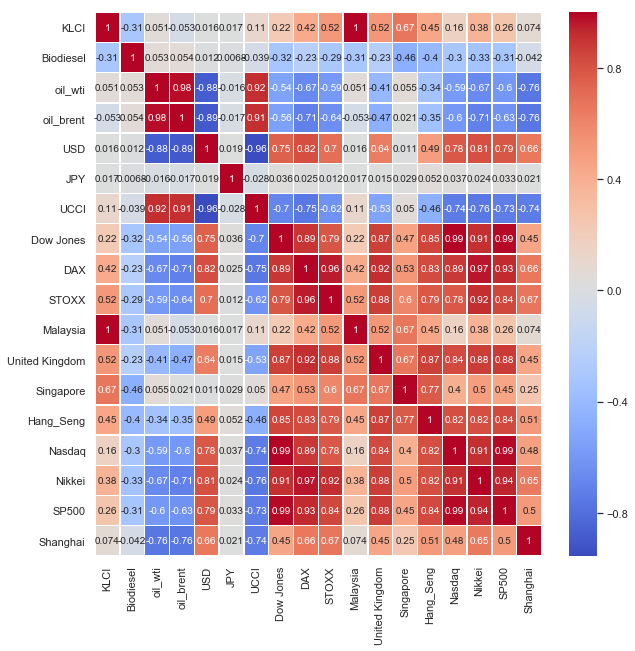

In [391]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=.5)

In [392]:
df.to_csv('Cleaned.csv',index=False,header=True)

In [436]:
df = pd.read_csv('Cleaned.csv')

In [394]:
df.head()

,Date,KLCI,Biodiesel,oil_wti,oil_brent,USD,JPY,UCCI,Dow Jones,DAX,STOXX,Malaysia,United Kingdom,Singapore,Hang_Seng,Nasdaq,Nikkei,SP500,Shanghai
0,2019-12-30,1615.67,3297.009355,61.66,68.30,4.1065,0.03775,181.189599,28462.14,13249.01,3748.47,1615.67,7587.05,3222.44,28319.39,8709.73,23656.62,3221.29,3040.02
1,2019-12-27,1610.61,3283.958387,61.76,68.91,4.1275,0.03771,181.236338,28645.26,13337.11,3782.27,1610.61,7644.90,3226.53,28225.42,8770.98,23837.72,3240.02,3005.04
2,2019-12-23,1614.18,3266.557097,60.51,67.49,4.1425,0.03787,181.298657,28551.53,13300.98,3776.66,1614.18,7623.59,3214.00,27906.41,8696.01,23821.11,3224.01,2962.75
3,2019-12-20,1610.18,3253.506129,60.43,68.66,4.1400,0.03782,181.345397,28455.09,13318.90,3776.56,1610.18,7582.48,3212.39,27871.35,8678.49,23816.63,3221.22,3004.94
4,2019-12-19,1596.01,3249.155806,61.30,69.70,4.1420,0.03786,181.360976,28376.96,13211.96,3739.17,1596.01,7573.82,3207.42,27800.49,8641.29,23864.85,3205.37,3017.07


## Machine Learning
### Multiple Linear Regression


Since data obtained is a continuous data Multiple Linear Regression(MLR) were usesd in this project.MLR works as predictive analysis as to illustrate a relationship between one continuous dependent variable (Y) with two or more independent variable (x). Below are the process conducted for MLR.

#### 1. Start by assigning x variable to USD, UCCI & Shanghai, while y variable to oil brent

In [437]:
from sklearn import datasets, linear_model

In [438]:
x = df[['USD','UCCI','Shanghai']]

In [439]:
y = df['oil_brent']

In [440]:
x.shape

(1713, 3)

In [441]:
y.shape

(1713,)

#### 2. Split the data into train and test 

In [442]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state = 81, test_size = 0.2)

In [443]:
xtrain.shape

(1370, 3)

In [444]:
xtest.shape

(343, 3)

In [403]:
xtrain.head()

,USD,UCCI,Shanghai
1359,3.0115,214.318514,2251.81
995,3.6315,198.847760,3336.28
1545,3.1575,211.641756,2300.80
1690,3.1545,204.027649,2392.06
1430,3.0394,214.322131,2275.34


#### 3. Applying Linear Regression model from sklearn library

In [445]:
from sklearn import linear_model
import statsmodels.api as sm

In [446]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [469]:
x = sm.add_constant(x)

In [470]:
model = sm.OLS(y, x).fit()
prediction = model.predict(x)

#### 4. Displaying value of prediction model 

In [471]:
prediction

0        56.844942
1        56.787159
2        56.954908
3        56.573906
4        56.404439
5        56.493220
6        56.353275
7        56.794315
8        57.176703
9        57.197425
10       56.998052
11       57.086100
12       57.223949
13       57.295822
14       57.218702
15       57.306500
16       57.288460
17       57.283650
18       57.390822
19       57.198120
20       56.917168
21       57.037978
22       57.466437
23       57.307094
24       57.324938
25       57.261309
26       57.589859
27       57.888085
28       57.575820
29       57.726688
           ...    
1683    100.770786
1684    100.851472
1685    100.182603
1686     99.809869
1687    100.269621
1688    100.676248
1689     98.991535
1690     99.528897
1691     99.383703
1692     98.855582
1693     98.536979
1694     98.616900
1695     99.851557
1696    100.376544
1697    100.590447
1698    102.061791
1699    102.326407
1700    102.313317
1701    102.936868
1702    102.724938
1703    101.453445
1704    101.

#### 5. Viewing summary of the model to observe on fit line of the model (r-squared value, standard errors, value coefficient of variable etc.)

In [459]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              oil_brent   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3455.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        02:29:24   Log-Likelihood:                -6394.2
No. Observations:                1713   AIC:                         1.280e+04
Df Residuals:                    1709   BIC:                         1.282e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.2412     19.133      3.723      0.0

#### 6.  Interpreting the OLS Regression results;

- p-values (P>|t|) - Determine if the variable has no correlation with the dependent variable. Here the p-values are all zero and all variable are not rejected. A significant value to drop is >0.05
- const - Value of the the gradient or Y-intercept. Example, if value X-variable are all equal to zero the output of Y-variable will be equal to value of gradient.
- Adjusted R-Squared - Range value between 0 to 1. Higher value shows better fit. From above 0.858 indicating a significant value
- USD - displaying negative value, means a negative relationship value of -22.5272 with independent variable 
- UCCI - displaying positive value, means a positive relationship value of 0.6165 with independent variable
- Shanghai - displaying negative value, means a negative relationship value of -0.0110 with independent variable

Hence, it can be conclude the final model is,  **oil_brent = 71.2412 - 22.5272(X1) +0.6165(X2) -0.0110(X3)**

#### 7. Plotting a scatterplot for final model

In [460]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

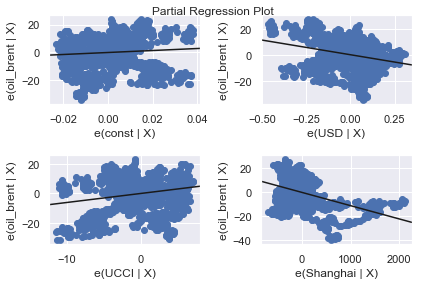

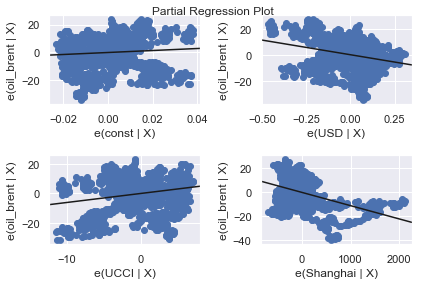

In [462]:
sm.graphics.plot_partregress_grid(model)

#### 8. Checking the standardized residuals

(array([ 17.,  42.,  96.,  95., 215., 371., 431., 299., 121.,  26.]),
 array([-3.28330559, -2.71957232, -2.15583905, -1.59210578, -1.02837252,
        -0.46463925,  0.09909402,  0.66282728,  1.22656055,  1.79029382,
         2.35402709]),
 <a list of 10 Patch objects>)

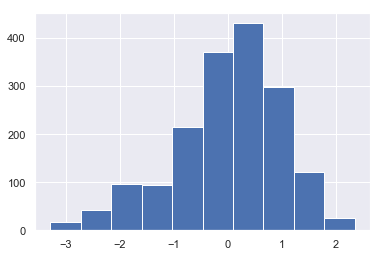

In [463]:
plt.hist(model.resid_pearson)

#### 9. Finding Root mean Square Error and r2 based on Prediction and Ytest (For accuracy)

In [476]:
test_set_armse = (np.sqrt(mean_squared_error(ytest, prediction[0:343,])))
test_set_r2 = r2_score(ytest, prediction[0:343,])

In [478]:
print("r-squared : {}".format(test_set_r2))
print("Average RMSE is : {}".format(test_set_armse))

r-squared : -0.4043089057110534
Average RMSE is : 31.95223762419106
